In [16]:
#libaries Ill be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
#NBA_API
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo, shotchartdetail, teamgamelog, boxscoreadvancedv2, leaguedashplayerstats, leaguedashteamstats
from nba_api.stats.static import *

#Basketball Reference API
from basketball_reference_web_scraper import client

#functions used in this file
from SGA_functions import *


## Player Analysis 
- **Name**: Shai Gilgeous-Alexander 
- **Position**: PG / SG
- **Height**: 6'6 
- **Weight**: 195 lbs
- **College**: Kentucky
- **Draft Year**: 2018 (Round 1 pick 11)
- **Country**: Canada

## Introduction
This notebook provides a detailed analysis of Shai Gilgeous-Alexander's performance throughout his NBA career. We will examine each season individually and then compare his progress over the years.



In [2]:
#player info and player ID
player_id = players.find_players_by_full_name('shai gilgeous-alexander')[0]['id']
player_name = 'Shai Gilgeous-Alexander'
seasons = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23','2023-24']
player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id).get_data_frames()[0]

In [3]:
#player career stats
data = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
data.describe()

,PLAYER_ID,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
count,6.0,6.000000e+00,6.000000,6.000000,6.000000,6.00000,6.000000,6.00000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1628983.0,1.610613e+09,22.500000,64.333333,62.833333,2115.50000,513.833333,1036.00000,0.492167,75.166667,...,0.834000,47.333333,258.000000,305.333333,312.666667,89.166667,48.833333,148.166667,146.666667,1468.333333
std,0.0,5.715476e+00,1.870829,16.741167,15.171245,507.55246,199.873377,359.82329,0.030486,18.004629,...,0.044222,17.037214,88.944927,99.502094,96.371503,41.392834,16.030180,28.902710,46.970913,605.499353
min,1628983.0,1.610613e+09,20.000000,35.000000,35.000000,1180.00000,287.000000,565.00000,0.453000,51.000000,...,0.800000,19.000000,147.000000,166.000000,207.000000,27.000000,23.000000,106.000000,70.000000,830.000000
25%,1628983.0,1.610613e+09,21.250000,59.000000,59.000000,2000.00000,375.000000,790.75000,0.472250,61.250000,...,0.807250,39.500000,191.500000,243.500000,241.500000,73.000000,45.250000,135.750000,123.250000,999.500000
50%,1628983.0,1.610613e+09,22.500000,69.000000,69.000000,2295.00000,477.500000,1033.50000,0.492000,79.000000,...,0.809000,52.000000,255.500000,303.500000,300.500000,87.500000,46.500000,147.500000,158.500000,1351.000000
75%,1628983.0,1.610613e+09,23.750000,73.750000,72.250000,2425.00000,647.500000,1298.75000,0.509500,88.500000,...,0.858000,58.500000,330.000000,391.250000,361.000000,108.000000,60.500000,160.000000,181.750000,1944.000000
max,1628983.0,1.610613e+09,25.000000,82.000000,75.000000,2553.00000,796.000000,1487.00000,0.535000,95.000000,...,0.905000,65.000000,365.000000,415.000000,465.000000,150.000000,67.000000,192.000000,192.000000,2254.000000


In [4]:
data.dtypes

PLAYER_ID              int64
SEASON_ID             object
LEAGUE_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_AGE           float64
GP                     int64
GS                     int64
MIN                  float64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PTS                    int64
dtype: object

In [5]:
#points,reb, assist trends
all_seasons_basic_data = pd.DataFrame()

for season in seasons:
    data = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
    season_basic_data = data.loc[data['SEASON_ID'] == season]
    all_seasons_basic_data = pd.concat([all_seasons_basic_data, season_basic_data], ignore_index=True)

all_seasons_basic_data
    
    

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1628983,2018-19,00,1610612746,LAC,20.0,82,73,2174.0,341,...,0.800,57,175,232,270,96,45,141,175,889
1,1628983,2019-20,00,1610612760,OKC,21.0,70,70,2428.0,478,...,0.807,47,365,412,232,79,47,134,117,1331
2,1628983,2020-21,00,1610612760,OKC,22.0,35,35,1180.0,287,...,0.808,19,147,166,207,27,23,106,70,830
3,1628983,2021-22,00,1610612760,OKC,23.0,56,56,1942.0,477,...,0.810,37,241,278,331,71,46,154,142,1371
4,1628983,2022-23,00,1610612760,OKC,24.0,68,68,2416.0,704,...,0.905,59,270,329,371,112,65,192,192,2135
5,1628983,2023-24,00,1610612760,OKC,25.0,75,75,2553.0,796,...,0.874,65,350,415,465,150,67,162,184,2254


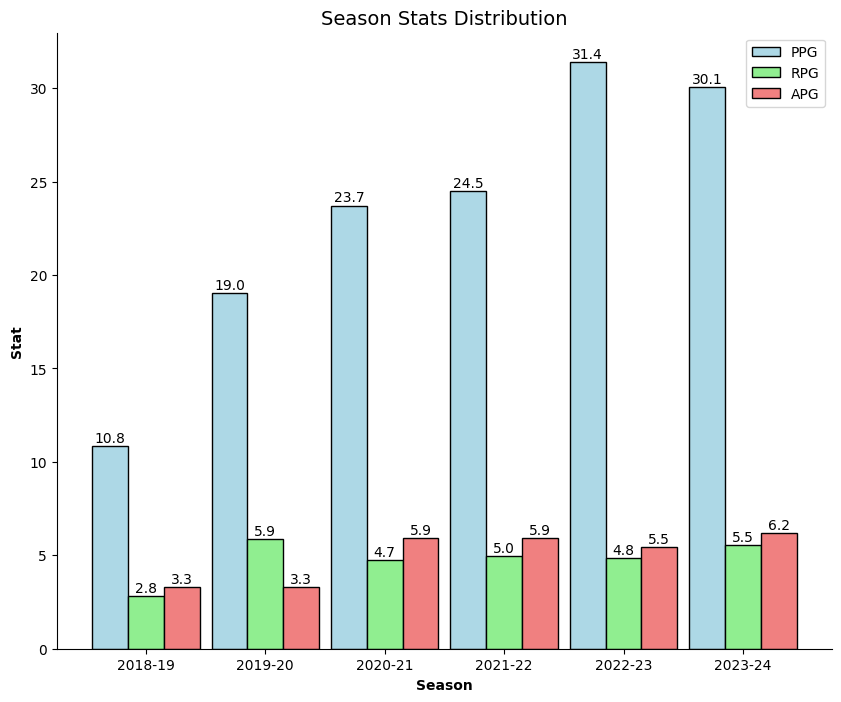

In [6]:
all_seasons_basic_data = pd.DataFrame()

# Fetch basic stats for each season and concatenate them into a single DataFrame
for season in seasons:
    data = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
    season_basic_data = data.loc[data['SEASON_ID'] == season]
    all_seasons_basic_data = pd.concat([all_seasons_basic_data, season_basic_data], ignore_index=True)

# Extract PPG, RPG, and APG for the bar chart
ppg = all_seasons_basic_data['PTS'] / all_seasons_basic_data['GP']
rpg = all_seasons_basic_data['REB'] / all_seasons_basic_data['GP']
apg = all_seasons_basic_data['AST'] / all_seasons_basic_data['GP']

# Setting the bar width
bar_width = 0.30

# Setting the position of bars on the x-axis
r1 = np.arange(len(seasons))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the bar chart
plt.figure(figsize=(10, 8))
bars1 = plt.bar(r1, ppg, color='lightblue', width=bar_width, edgecolor='black', label='PPG')
bars2 = plt.bar(r2, rpg, color='lightgreen', width=bar_width, edgecolor='black', label='RPG')
bars3 = plt.bar(r3, apg, color='lightcoral', width=bar_width, edgecolor='black', label='APG')

# Adding numbers on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)

# Adding labels
plt.xlabel('Season', fontweight='bold')
plt.ylabel('Stat', fontweight='bold')
plt.title('Season Stats Distribution', fontsize=14)
plt.xticks([r + bar_width for r in range(len(seasons))], seasons)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.show()


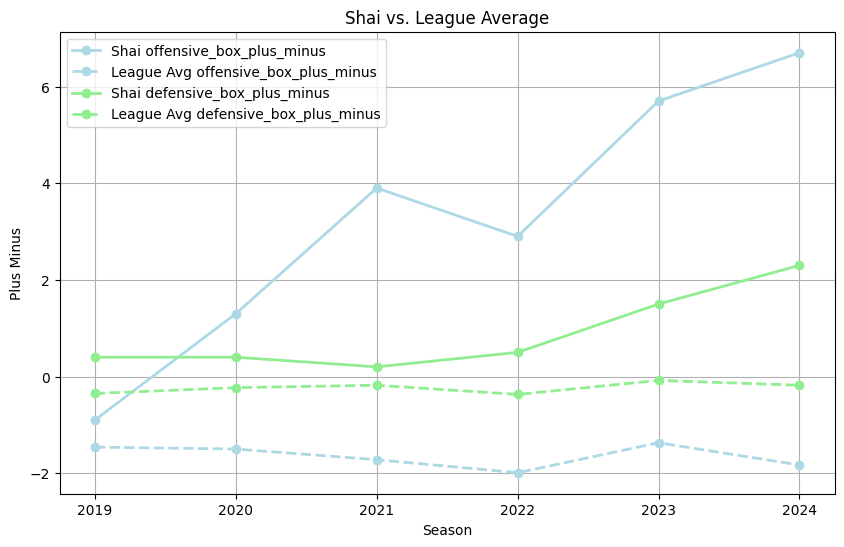

In [24]:
seasons_adv = ['2019', '2020', '2021', '2022', '2023', '2024']
shai_stats = pd.DataFrame()
league_avgs_stats = pd.DataFrame()

# Fetch and concatenate advanced stats data for each season
for season in seasons_adv:
    # Fetch Shai's stats
    shai_df = basketball_reference_adv_data(season)
    shai_df['Season'] = season
    shai_stats = pd.concat([shai_stats, shai_df], ignore_index=True)
    
    # Fetch league averages
    league_avgs = league_BR_stats(season)
    league_avgs_df = pd.DataFrame([league_avgs], index=[season])
    league_avgs_stats = pd.concat([league_avgs_stats, league_avgs_df])

# Set the 'Season' column as the index
shai_stats.set_index('Season', inplace=True)
league_avgs_stats.index.name = 'Season'

metrics = ['offensive_box_plus_minus', 'defensive_box_plus_minus']

# Color mapping for each metric
colors = {
    'offensive_box_plus_minus': 'lightblue',
    'defensive_box_plus_minus': 'lightgreen'
}

# Plot the data
plt.figure(figsize=(10, 6))

for metric in metrics:
    # Plot Shai's stats
    plt.plot(shai_stats.index, shai_stats[metric], marker='o', label=f'Shai {metric}',color=colors[metric], linestyle='-', linewidth=2)
    
    # Plot league average stats
    plt.plot(league_avgs_stats.index, league_avgs_stats[metric], marker='o', label=f'League Avg {metric}',color=colors[metric], linestyle='--', linewidth=2)

# Customize the plot
plt.title('Shai vs. League Average')
plt.xlabel('Season')
plt.ylabel('Plus Minus')
plt.legend()
plt.grid(True)

plt.show()


Visualizing Player Shots on an NBA Court

Using the guide from [Savvas Tjortjoglou's blog](http://savvastjortjoglou.com/nba-shot-sharts.html), I was able to construct an NBA court diagram to display player shots.

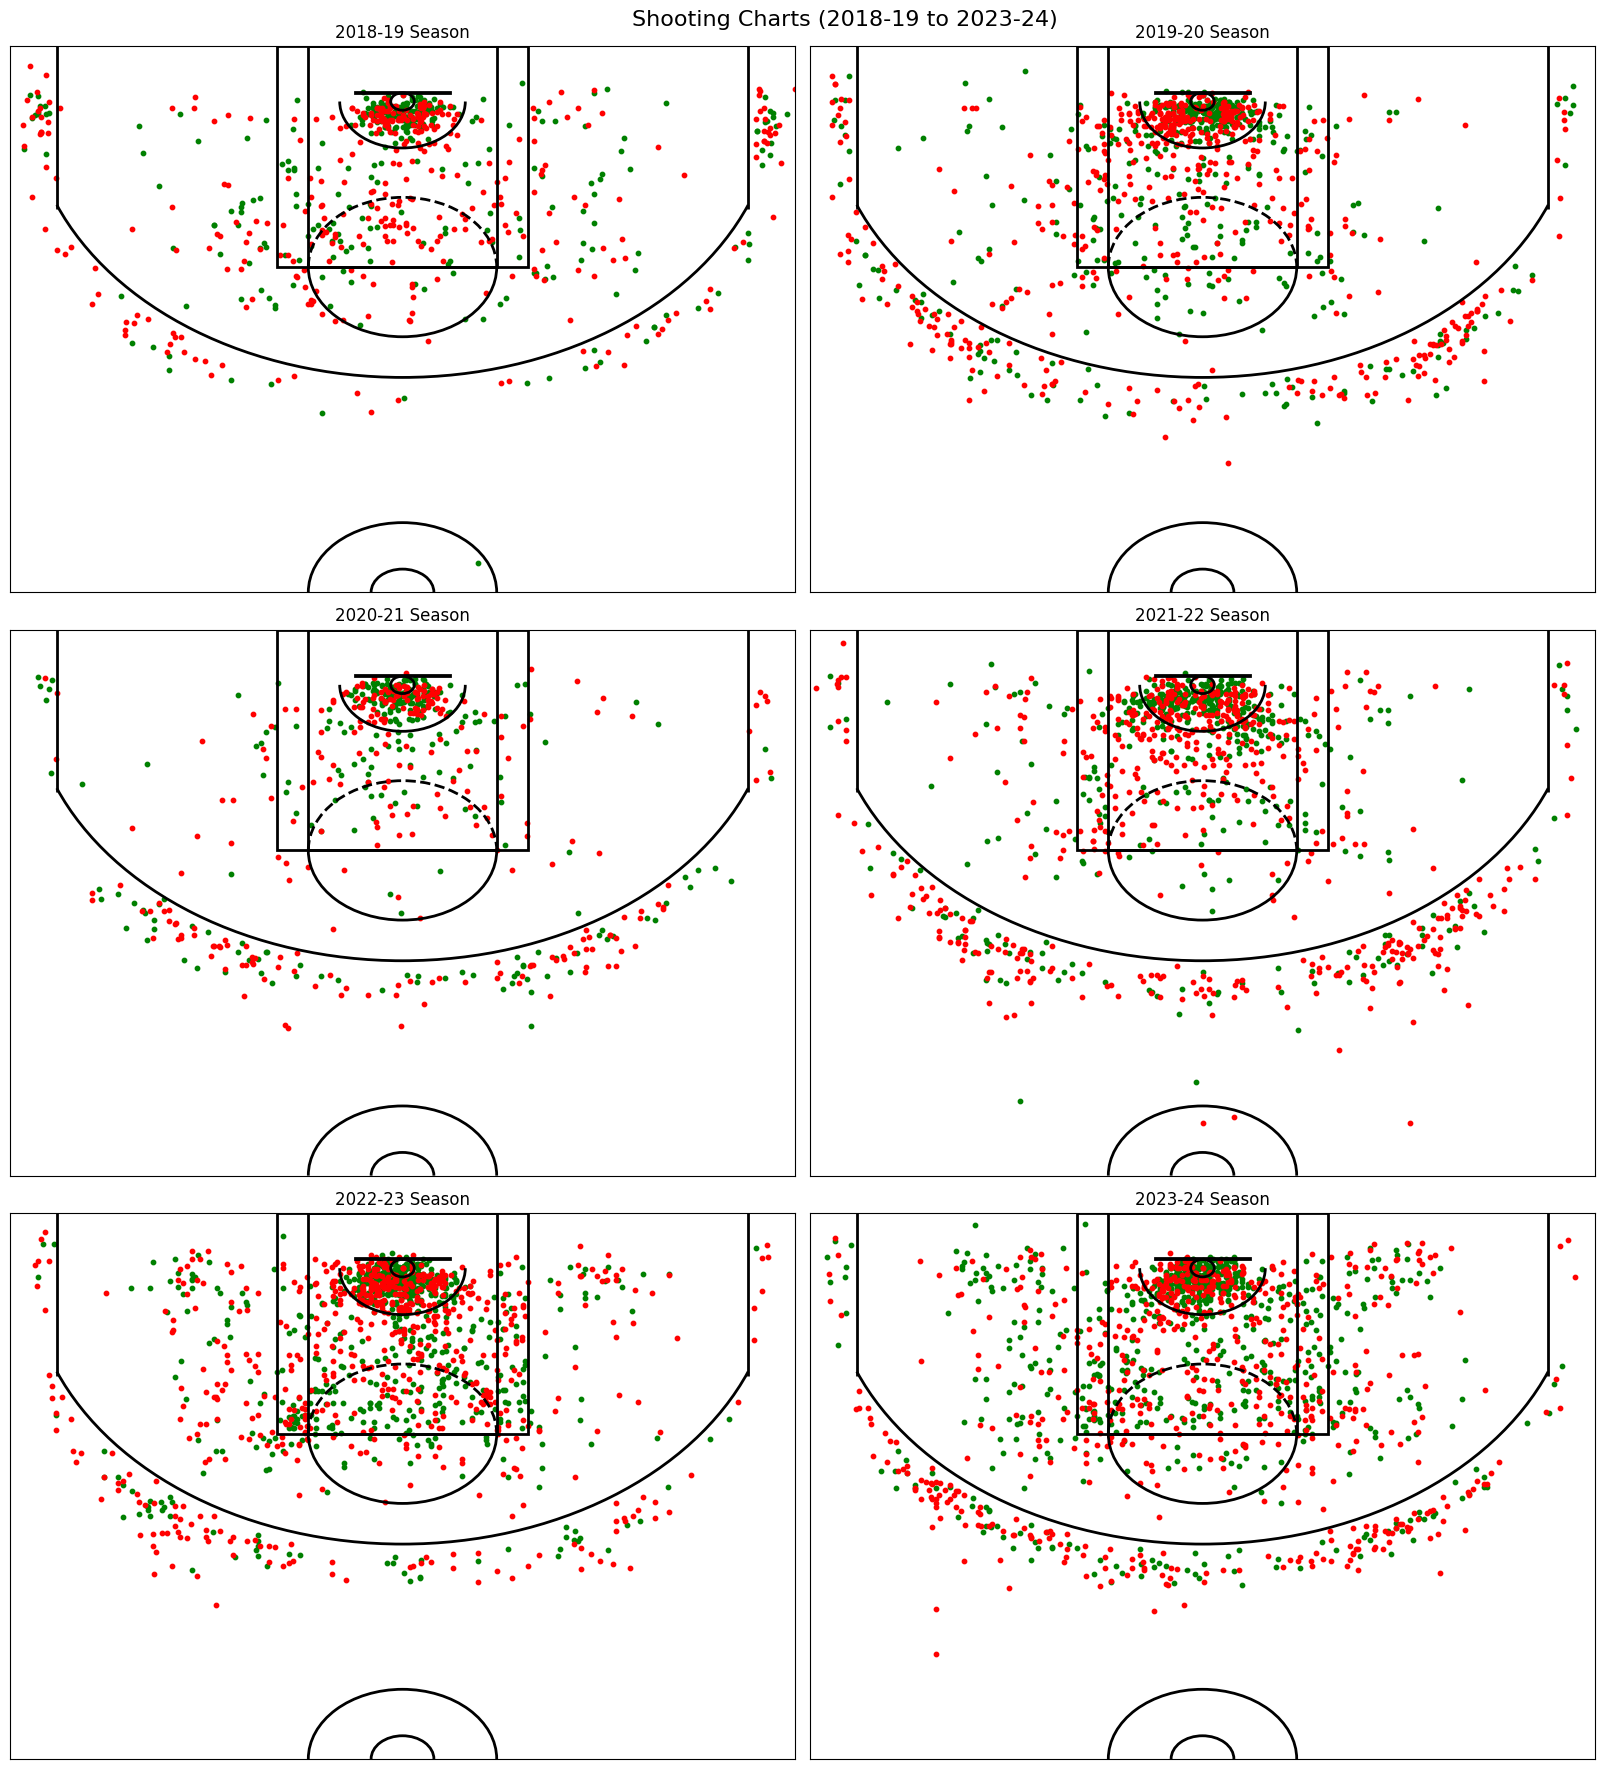

In [10]:
rows = 3  # Number of rows
cols = 2  # Number of columns (2 per row)

fig, axes = plt.subplots(rows, cols, figsize=(17, 18))  # Create subplots with a 3x2 grid

for i, season in enumerate(seasons):
    # Get shot data for each season
    shot_chart = get_shot_chart(player_id=player_id, year=season)
    
    # Track shots made and missed
    made_shots = shot_chart[shot_chart['SHOT_MADE_FLAG'] == 1]
    missed_shots = shot_chart[shot_chart['SHOT_MADE_FLAG'] == 0]
    
    # Determine the row and column index for the subplot
    row = i // cols
    col = i % cols
    
    # Plot in the corresponding subplot
    ax = axes[row, col]
    ax.set_title(f'{season} Season')
    ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots', s=10)
    ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots', s=10)
    draw_court(ax=ax)  # Assuming draw_court function accepts an axis parameter
    ax.set_xlim(-250, 250)
    ax.set_ylim(422.5, -47.5)
    ax.axis('on')  # Turn off axis labels and ticks
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Add a main title
fig.suptitle('Shooting Charts (2018-19 to 2023-24)', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, .95, 1])
plt.show()


In [11]:
# Get the shot chart data for 2018-19
shot_chart_2019 = get_shot_chart(player_id=player_id, year='2018-19')

# Identify the top 5 actions based on frequency
top_actions = shot_chart_2019.groupby(['ACTION_TYPE']).size().sort_values(ascending=False).head(5).index.tolist()

print("Top 5 Actions in 2018-19:", top_actions)

# Initialize an empty DataFrame to store the data across all seasons
all_seasons_data = pd.DataFrame()

# Loop through each season and fetch the shot data
for season in seasons:
    season_data = get_shot_chart(player_id=player_id, year=season)
    season_data['SEASON'] = season  # Add a season column
    all_seasons_data = pd.concat([all_seasons_data, season_data], ignore_index=True)

print("All Seasons Data Loaded")

# Filter the data to only include the top actions identified from the 2018-19 season
filtered_data = all_seasons_data[all_seasons_data['ACTION_TYPE'].isin(top_actions)]

print("Filtered Data with Top Actions")


Top 5 Actions in 2018-19: ['Jump Shot', 'Pullup Jump shot', 'Driving Layup Shot', 'Running Layup Shot', 'Step Back Jump shot']
All Seasons Data Loaded
Filtered Data with Top Actions


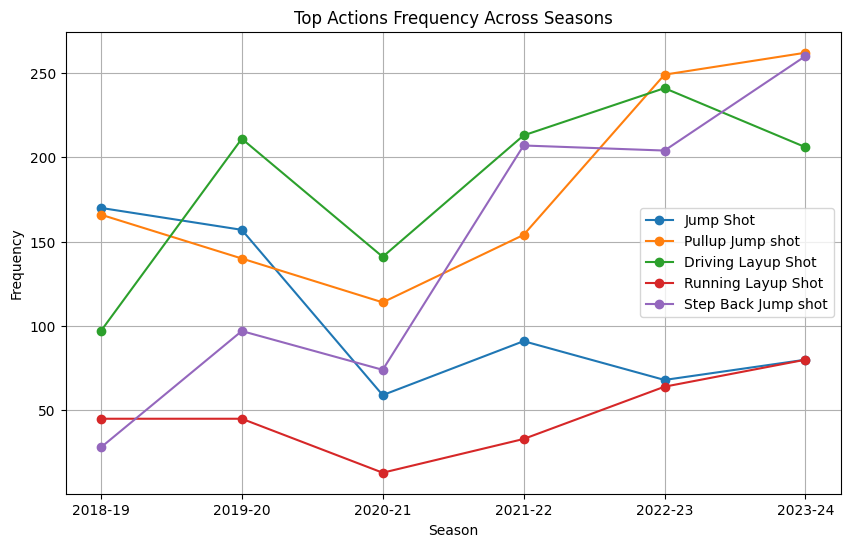

In [12]:
# Group the filtered data by season and action type to count the occurrences of each action per season
action_counts = filtered_data.groupby(['SEASON', 'ACTION_TYPE']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))
for action in top_actions:
    plt.plot(action_counts.index, action_counts[action], marker='o', label=action)

plt.title('Top Actions Frequency Across Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


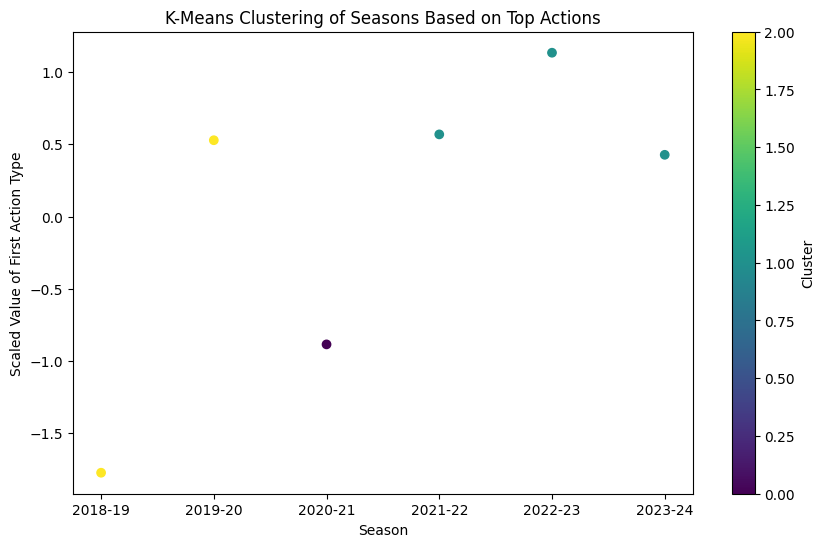

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(action_counts)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
action_counts['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (optional, for deeper insights)
plt.figure(figsize=(10, 6))
plt.scatter(action_counts.index, scaled_data[:, 0], c=action_counts['Cluster'], cmap='viridis')
plt.xlabel('Season')
plt.ylabel('Scaled Value of First Action Type')
plt.title('K-Means Clustering of Seasons Based on Top Actions')
plt.colorbar(label='Cluster')
plt.show()


- Cluster 0 (blue): Seasons where SGA focused more on driving to the basket.
- Cluster 1 (green): Seasons with a more balanced scoring approach.
- Cluster 2 (yellow): Seasons where perimeter shooting was a key focus.

In [14]:
# Group the data by shot location (LOC_X, LOC_Y) and calculate makes and attempts
fg_data = all_seasons_data.groupby(['LOC_X', 'LOC_Y']).agg(
    makes=('SHOT_MADE_FLAG', 'sum'),
    attempts=('SHOT_MADE_FLAG', 'count')
).reset_index()

# Calculate FG% (Field Goal Percentage)
fg_data['FG%'] = fg_data['makes'] / fg_data['attempts']

fg_data

,LOC_X,LOC_Y,makes,attempts,FG%
0,-246,3,0,1,0.0
1,-242,20,0,1,0.0
2,-241,38,0,1,0.0
3,-241,41,1,1,1.0
4,-239,-10,1,1,1.0
...,...,...,...,...,...
5225,238,38,1,1,1.0
5226,240,20,0,1,0.0
5227,241,53,0,1,0.0
5228,245,11,1,1,1.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'stat_func'
  cset = contour_func(


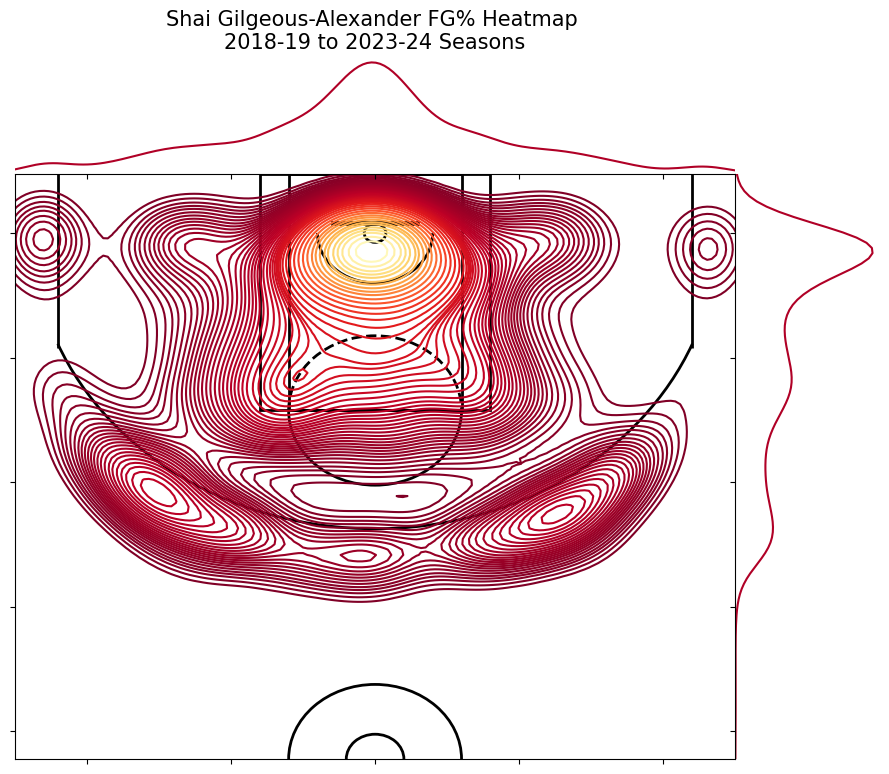

In [17]:
# Define the colormap for the heatmap
cmap=plt.cm.YlOrRd_r 

# Create a KDE plot for FG%
joint_shot_chart = sns.jointplot(x=fg_data.LOC_X, y=fg_data.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

# Set the size of the plot
joint_shot_chart.fig.set_size_inches(10, 8)

# Get the main Axes of the jointplot to customize it
ax = joint_shot_chart.ax_joint
draw_court(ax)  # Assuming draw_court is defined to draw the basketball court

# Adjust the axis limits and orientation for half-court display
ax.set_xlim(-250, 250)
ax.set_ylim(422.5, -47.5)

# Remove axis labels and tick marks for a cleaner look
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title to the plot
ax.set_title('Shai Gilgeous-Alexander FG% Heatmap \n2018-19 to 2023-24 Seasons', 
             y=1.2, fontsize=15)

plt.show()
